# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
avail_city = []
lat = []
lon = []
temp = []
clouds = []
country = []
date = []
humidity = []
max_temp = []
wind = []
ind = 1
setkey = 1

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    print(f"Processing Record {ind} of Set {setkey} | {city}")
    response = requests.get(query_url + city)
    
    if response.status_code == 200:
        response = response.json()
        avail_city.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])  
        wind.append(response['wind']['speed'])  
    else:
        print ('City not found. Skipping...')
        
 
    if ind < 50:
        ind += 1
    else:  
        ind = 1
        setkey += 1
        time.sleep(1)

print("-----------------------------")  
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | emerald
Processing Record 4 of Set 1 | ngunguru
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | heihe
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | borodyanka
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | tidore
City not found. Skipping...
Processing Record 11 of Set 1 | mergui
City not found. Skipping...
Processing Record 12 of Set 1 | cermik
Processing Record 13 of Set 1 | knyaze-volkonskoye
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | rossland
Processing Record 17 of Set 1 | nakamura
Processing Record 18 of Set 1 | la ronge
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | uruzgan
Processing Record 21 of Set 1 | kurilsk
Processing Record 22 of Set 1 | punta aren

Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | mount gambier
Processing Record 38 of Set 4 | avarua
Processing Record 39 of Set 4 | djibo
Processing Record 40 of Set 4 | scottsburgh
City not found. Skipping...
Processing Record 41 of Set 4 | safaga
Processing Record 42 of Set 4 | havoysund
Processing Record 43 of Set 4 | belaya gora
Processing Record 44 of Set 4 | aranos
Processing Record 45 of Set 4 | yenagoa
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | udomlya
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | joao pinheiro
Processing Record 1 of Set 5 | brae
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | rafaela
Processing Record 4 of Set 5 | bronkhorstspruit
Processing Record 5 of Set 5 | tomatlan
Processing Record 6 of Set 5 | carballo
Processing Record 7 of Set 5 | konitsa
Processing Record 8 of Set 5 | nanakuli
Processing Record 9

Processing Record 27 of Set 8 | nichinan
Processing Record 28 of Set 8 | vardo
Processing Record 29 of Set 8 | luderitz
Processing Record 30 of Set 8 | maniitsoq
Processing Record 31 of Set 8 | manokwari
Processing Record 32 of Set 8 | pacifica
Processing Record 33 of Set 8 | te anau
Processing Record 34 of Set 8 | teguldet
Processing Record 35 of Set 8 | juneau
Processing Record 36 of Set 8 | grand gaube
Processing Record 37 of Set 8 | ginir
Processing Record 38 of Set 8 | san matias
Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | alofi
Processing Record 41 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 42 of Set 8 | stonewall
Processing Record 43 of Set 8 | urengoy
Processing Record 44 of Set 8 | pandan
Processing Record 45 of Set 8 | palmas
Processing Record 46 of Set 8 | kruisfontein
Processing Record 47 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 48 of Set 8 | nguiu
City not found. Skipping...
Processing Record 

Processing Record 14 of Set 12 | ancud
Processing Record 15 of Set 12 | burns lake
Processing Record 16 of Set 12 | remanso
Processing Record 17 of Set 12 | saldanha
Processing Record 18 of Set 12 | qui nhon
Processing Record 19 of Set 12 | yumbel
Processing Record 20 of Set 12 | maldonado
Processing Record 21 of Set 12 | sudbury
Processing Record 22 of Set 12 | fairbanks
Processing Record 23 of Set 12 | itarema
Processing Record 24 of Set 12 | kismayo
Processing Record 25 of Set 12 | haibowan
City not found. Skipping...
Processing Record 26 of Set 12 | armidale
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | marzuq
Processing Record 29 of Set 12 | yanam
Processing Record 30 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 31 of Set 12 | kavieng
Processing Record 32 of Set 12 | imbituba
Processing Record 33 of Set 12 | manali
Processing Record 34 of Set 12 | indian head
Processing Record 35 of Set 12 | dvinskoy
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "City": avail_city,
    "Cloudiness": clouds,
    "Country": country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lon,
    "Max_Temp" : max_temp,
    "Wind_Speed" : wind 
}
city_data = pd.DataFrame(weather_dict)

output_file = os.path.join("output_data", "cities.csv")

try:
    os.makedirs("output_data")
except FileExistsError:
    # directory already exists
    pass


city_data.index.names = ['City_ID']

city_data.to_csv(output_file, encoding='utf-8')
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,albany,71,US,1593315320,91,42.60,-73.97,66.99,2.71
1,georgetown,20,MY,1593315344,74,5.41,100.34,86.00,10.29
2,emerald,75,AU,1593315345,49,-23.53,148.17,73.40,12.75
3,ngunguru,5,NZ,1593315346,66,-35.62,174.50,62.01,3.00
4,ushuaia,20,AR,1593315290,59,-54.80,-68.30,35.60,20.80
...,...,...,...,...,...,...,...,...,...
552,monrovia,94,LR,1593315716,88,6.30,-10.80,75.90,4.61
553,buchanan,95,LR,1593315717,88,5.88,-10.05,75.49,5.73
554,farafangana,15,MG,1593315717,90,-22.82,47.83,66.51,8.19


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# weather_data = weather_data.loc[weather_data["Humidity"]<= 100]
clean_city_data = city_data.loc[city_data["Humidity"]<= 100]
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,albany,71,US,1593315320,91,42.60,-73.97,66.99,2.71
1,georgetown,20,MY,1593315344,74,5.41,100.34,86.00,10.29
2,emerald,75,AU,1593315345,49,-23.53,148.17,73.40,12.75
3,ngunguru,5,NZ,1593315346,66,-35.62,174.50,62.01,3.00
4,ushuaia,20,AR,1593315290,59,-54.80,-68.30,35.60,20.80
...,...,...,...,...,...,...,...,...,...
552,monrovia,94,LR,1593315716,88,6.30,-10.80,75.90,4.61
553,buchanan,95,LR,1593315717,88,5.88,-10.05,75.49,5.73
554,farafangana,15,MG,1593315717,90,-22.82,47.83,66.51,8.19


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
if len(clean_city_data) < len(city_data):
    clean_city_data.to_csv(output_file, encoding='utf-8')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

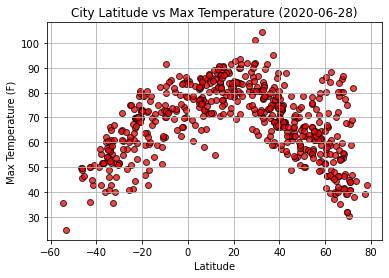

In [13]:
utc_time = datetime.datetime.fromtimestamp(
        int(clean_city_data["Date"][1])
    ).strftime('%Y-%m-%d')

plt.scatter(clean_city_data["Lat"], clean_city_data["Max_Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title(f"City Latitude vs Max Temperature ({utc_time})")
plt.savefig('output_data\Fig1.png')

# Latitude vs. Humidity Plot

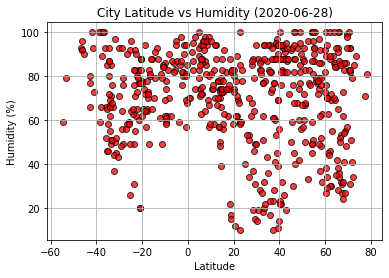

In [14]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title(f"City Latitude vs Humidity ({utc_time})")
plt.savefig('output_data\Fig2.png')

## Latitude vs. Cloudiness Plot

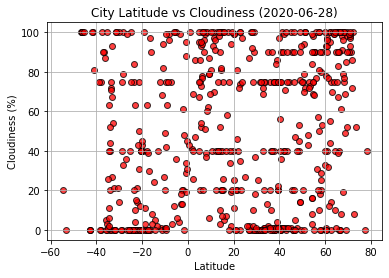

In [15]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title(f"City Latitude vs Cloudiness ({utc_time})")
plt.savefig('output_data\Fig3.png')

## Latitude vs. Wind Speed Plot

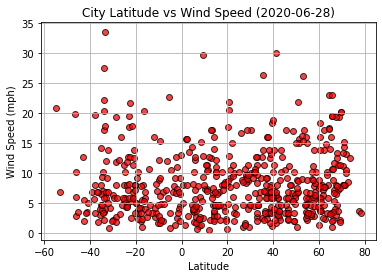

In [16]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind_Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.title(f"City Latitude vs Wind Speed ({utc_time})")
plt.savefig('output_data\Fig4.png')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
north_city_data = clean_city_data.loc[clean_city_data["Lat"]> 0]
south_city_data = clean_city_data.loc[clean_city_data["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

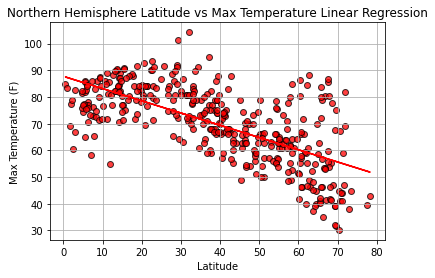

In [18]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data["Lat"], north_city_data["Max_Temp"])
regress_values = north_city_data["Lat"] * slope + intercept
plt.plot(north_city_data["Lat"],regress_values,"r-")

plt.scatter(north_city_data["Lat"], north_city_data["Max_Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("Northern Hemisphere Latitude vs Max Temperature Linear Regression")
plt.savefig('output_data\Fig5.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

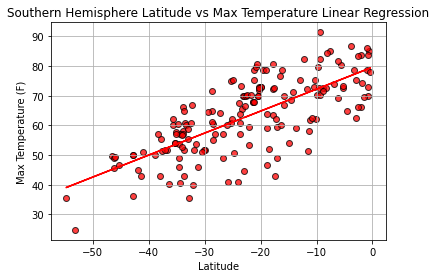

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data["Lat"], south_city_data["Max_Temp"])
regress_values = south_city_data["Lat"] * slope + intercept
plt.plot(south_city_data["Lat"],regress_values,"r-")

plt.scatter(south_city_data["Lat"], south_city_data["Max_Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("Southern Hemisphere Latitude vs Max Temperature Linear Regression")
plt.savefig('output_data\Fig6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

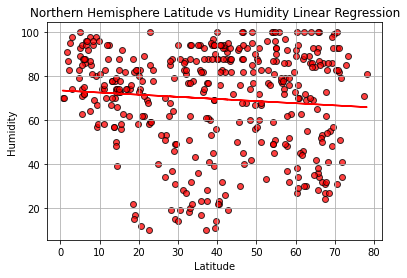

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data["Lat"], north_city_data["Humidity"])
regress_values = north_city_data["Lat"] * slope + intercept
plt.plot(north_city_data["Lat"],regress_values,"r-")

plt.scatter(north_city_data["Lat"], north_city_data["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.title("Northern Hemisphere Latitude vs Humidity Linear Regression")
plt.savefig('output_data\Fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

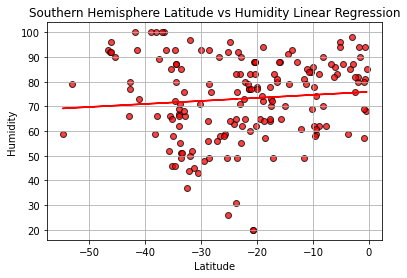

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data["Lat"], south_city_data["Humidity"])
regress_values = south_city_data["Lat"] * slope + intercept
plt.plot(south_city_data["Lat"],regress_values,"r-")

plt.scatter(south_city_data["Lat"], south_city_data["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.title("Southern Hemisphere Latitude vs Humidity Linear Regression")
plt.savefig('output_data\Fig8.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

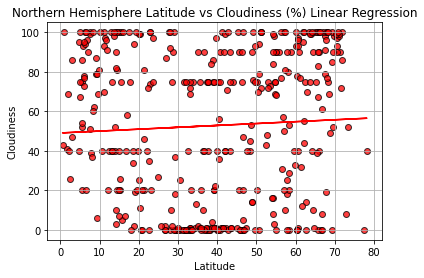

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data["Lat"], north_city_data["Cloudiness"])
regress_values = north_city_data["Lat"] * slope + intercept
plt.plot(north_city_data["Lat"],regress_values,"r-")

plt.scatter(north_city_data["Lat"], north_city_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.title("Northern Hemisphere Latitude vs Cloudiness (%) Linear Regression")
plt.savefig('output_data\Fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

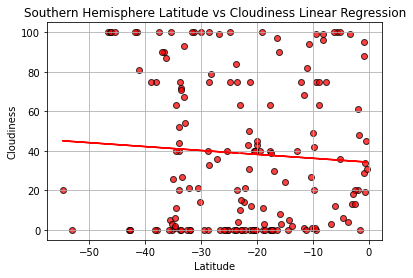

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data["Lat"], south_city_data["Cloudiness"])
regress_values = south_city_data["Lat"] * slope + intercept
plt.plot(south_city_data["Lat"],regress_values,"r-")

plt.scatter(south_city_data["Lat"], south_city_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.title("Southern Hemisphere Latitude vs Cloudiness Linear Regression")
plt.savefig('output_data\Fig10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

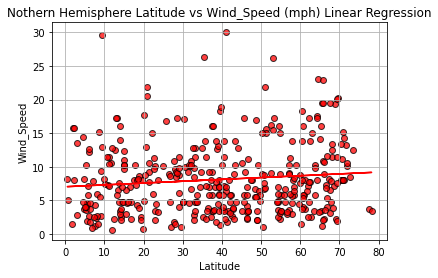

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data["Lat"], north_city_data["Wind_Speed"])
regress_values = north_city_data["Lat"] * slope + intercept
plt.plot(north_city_data["Lat"],regress_values,"r-")

plt.scatter(north_city_data["Lat"], north_city_data["Wind_Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.grid()
plt.title("Nothern Hemisphere Latitude vs Wind_Speed (mph) Linear Regression")
plt.savefig('output_data\Fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

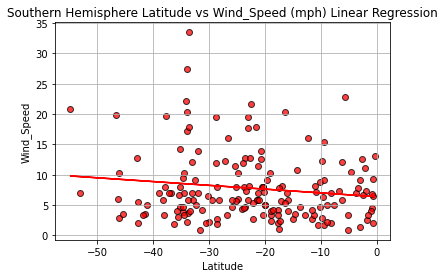

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data["Lat"], south_city_data["Wind_Speed"])
regress_values = south_city_data["Lat"] * slope + intercept
plt.plot(south_city_data["Lat"],regress_values,"r-")

plt.scatter(south_city_data["Lat"], south_city_data["Wind_Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.grid()
plt.title("Southern Hemisphere Latitude vs Wind_Speed (mph) Linear Regression")
plt.savefig('output_data\Fig12.png')

Observable Trends:
1. Cities having latitude close to 0, have higher Max temperature and when cities move away from 0 latitude, max temperature drops.
2. Humidity level reduces when moving away from latitude 0 (equator)

3. Wind speed increses when moving away from latitude 0 (equator) 